In [1]:
#Import important libraries 

import sys
import os
import cv2
import easygui
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
#loading the image

imagepath=easygui.fileopenbox()
image =cv2.imread(imagepath, 1)

if image is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#Converting the color space from RGB to Grayscale
gray_image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

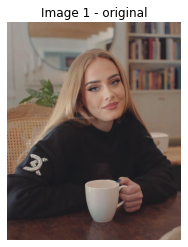

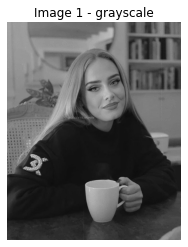

In [3]:
#Displaying all the images
plt.imshow(image)
plt.axis("off")
plt.title("Image 1 - original")
plt.show()

plt.imshow(gray_image,cmap='gray')
plt.axis("off")
plt.title("Image 1 - grayscale")
plt.show()

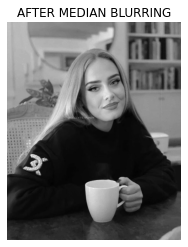

In [4]:
#Median Blurring
image_blurred =cv2.medianBlur(gray_image,3)
plt.imshow(image_blurred,cmap='gray')
plt.axis("off")
plt.title("AFTER MEDIAN BLURRING")
plt.show()

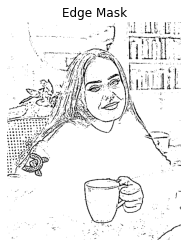

In [5]:
#Creating edge mask (trying to increase the edges of the image)

edges=cv2.adaptiveThreshold(image_blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,3)
plt.imshow(edges,cmap='gray')
plt.axis("off")
plt.title("Edge Mask")
plt.show()

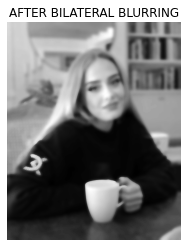

In [6]:
#Reduse the noise
image_noise=cv2.bilateralFilter(image_blurred, 15, 75, 75)

plt.imshow(image_noise,cmap='gray')
plt.axis("off")
plt.title("AFTER BILATERAL BLURRING")
plt.show()

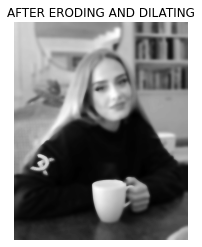

In [7]:
#Eroding and Dilating
kernel=np.ones((1,1),np.uint8)
image_eroding=cv2.erode(image_noise,kernel,iterations=3)
image_dilating=cv2.dilate(image_eroding,kernel,iterations=3)
plt.imshow(image_dilating,cmap='gray')
plt.axis("off")
plt.title("AFTER ERODING AND DILATING")
plt.show()

In [8]:
#transform image 

image_final=np.float32(image).reshape(-1,3)

#determine criteria
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,1.0)

#implementing k-means clustering
compactness,label,center=cv2.kmeans(image_final,5,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

center=np.uint8(center)
final_img=center[label.flatten()]
final_img=final_img.reshape(image.shape)

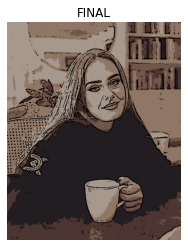

In [9]:
final=cv2.bitwise_and(final_img,final_img,mask=edges)
plt.imshow(final,cmap='gray')
plt.axis("off")
plt.title("FINAL")
plt.show()